In [13]:
import os, json
from PIL import Image
import matplotlib.pyplot as plt

def load_pair_from_label(label_path, images_root):
    """
    Given the path to an xBD JSON label, and the root directory
    where the pre- and post-disaster image folders live,
    return a (PIL.Image pre, PIL.Image post) tuple.
    """
    # 1) read the JSON
    with open(label_path, 'r') as f:
        label = json.load(f)

    # 2) figure out which keys point to image files
    #    This will vary slightly depending on your release.
    #    Common fields are under label['metadata']
    meta = label.get('metadata', {})
    pre_name  = meta.get('pre_image_name')   or meta.get('scene_pre_disaster') 
    post_name = meta.get('post_image_name')  or meta.get('scene_post_disaster')

    if pre_name is None or post_name is None:
        raise KeyError(f"Couldn’t find pre/post image names in {label_path}\n"
                       f"Available keys: {list(meta.keys())}")

    # 3) build full paths and open
    pre_path  = os.path.join(images_root, 'pre_disaster',  pre_name)
    post_path = os.path.join(images_root, 'post_disaster', post_name)

    pre_img  = Image.open(pre_path).convert('RGB')
    post_img = Image.open(post_path).convert('RGB')

    return pre_img, post_img

# --- example usage: ---
label_file   = '../data/train/labels/guatemala-volcano_00000000_post_disaster.json'
images_root  = '../data/train/images'   # contains subfolders pre_disaster/ and post_disaster/

pre, post = load_pair_from_label(label_file, images_root)

# display side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(pre);  ax1.set_title("Pre-disaster");  ax1.axis('off')
ax2.imshow(post); ax2.set_title("Post-disaster"); ax2.axis('off')
plt.tight_layout()
plt.show()


KeyError: "Couldn’t find pre/post image names in ../data/train/labels/guatemala-volcano_00000000_post_disaster.json\nAvailable keys: ['sensor', 'provider_asset_type', 'gsd', 'capture_date', 'off_nadir_angle', 'pan_resolution', 'sun_azimuth', 'sun_elevation', 'target_azimuth', 'disaster', 'disaster_type', 'catalog_id', 'original_width', 'original_height', 'width', 'height', 'id', 'img_name']"

min, max, mean pixel values: 0 4 0.052032470703125


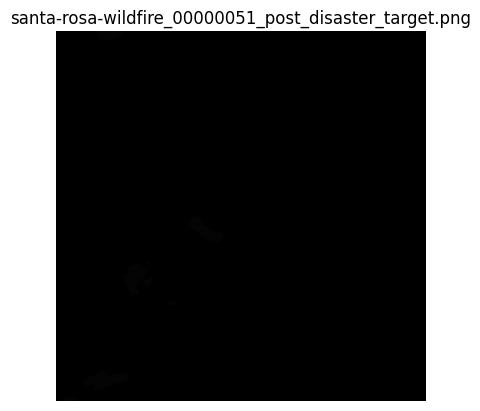

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# pick one filename you know is “black” after transform
fn = os.listdir("../data/train/targets")[0]
raw = Image.open(f"../data/train/targets/{fn}").convert("RGB")
arr = np.array(raw)

print("min, max, mean pixel values:", arr.min(), arr.max(), arr.mean())
plt.imshow(arr); plt.title(fn); plt.axis("off"); plt.show()


In [11]:
!ls -l ../data/test/


total 4096
drwx------@ 1 leojiang  staff  655360 Apr  6  2020 images
drwx------@ 1 leojiang  staff  655360 Apr  6  2020 labels
drwx------@ 1 leojiang  staff  786432 Apr  6  2020 targets
